In [202]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [203]:
samsung_base_dir = r'D:\MyDocuments\Downloads\samsunghealth_toanyone_202101111626\samsunghealth_toanyone_202101111626'

In [206]:
samsung_dump_dirs = glob(os.path.join(samsung_base_dir, '*'))
samsung_dump_dir = os.path.basename(samsung_dump_dirs[0])
print(len(samsung_dump_dirs), 'dumps found, taking first:', samsung_dump_dir)

samsung_csv_paths = glob(os.path.join(samsung_base_dir, samsung_dump_dir, '*.csv'))
print(len(samsung_csv_paths), 'csvs found')
samsung_json_paths = glob(os.path.join(samsung_base_dir, samsung_dump_dir, 'jsons', '*',  '*.json'))
print(len(samsung_json_paths), 'jsons found')

59 dumps found, taking first: com.samsung.health.caffeine_intake.202101111626.csv
0 csvs found
0 jsons found


In [351]:
step_df = pd.read_csv(samsung_base_dir + '\com.samsung.shealth.step_daily_trend.202101111626.csv', index_col=False)

우선 Dataframe 구조를 한번 확인해 보자

In [352]:
step_df.head(5)

,binning_data,update_time,create_time,source_pkg_name,source_type,count,speed,distance,calorie,deviceuuid,pkg_name,datauuid,day_time
0,a77e3f6b-b39a-48ac-8015-1acfc94a9f6c.binning_d...,2019-06-03 22:13:00.592,2019-06-03 22:13:00.592,com.sec.android.app.shealth,0,6576,0.0,5443.92,294.96008,Dl8L2b9Gg3,com.sec.android.app.shealth,a77e3f6b-b39a-48ac-8015-1acfc94a9f6c,1429920000000
1,74c33458-6a2e-47c3-baee-6ca703312412.binning_d...,2019-06-03 22:13:00.584,2019-06-03 22:13:00.584,com.sec.android.app.shealth,0,7164,0.0,5798.46,305.13004,Dl8L2b9Gg3,com.sec.android.app.shealth,74c33458-6a2e-47c3-baee-6ca703312412,1429833600000
2,b8410545-6c6f-47eb-96a1-95c5f563f63a.binning_d...,2019-06-03 22:13:00.599,2019-06-03 22:13:00.599,com.sec.android.app.shealth,0,5643,0.0,4674.95,254.93005,Dl8L2b9Gg3,com.sec.android.app.shealth,b8410545-6c6f-47eb-96a1-95c5f563f63a,1430438400000
3,02f7155a-bdd2-4e3b-b944-9af7db9e1731.binning_d...,2019-06-03 22:13:00.599,2019-06-03 22:13:00.599,com.sec.android.app.shealth,0,9718,0.0,8103.29,421.40005,Dl8L2b9Gg3,com.sec.android.app.shealth,02f7155a-bdd2-4e3b-b944-9af7db9e1731,1430352000000
4,b3367ef8-f532-4723-9bf0-a2c1f74bf721.binning_d...,2019-06-03 22:13:00.598,2019-06-03 22:13:00.598,com.sec.android.app.shealth,0,11072,0.0,9119.21,511.30010,Dl8L2b9Gg3,com.sec.android.app.shealth,b3367ef8-f532-4723-9bf0-a2c1f74bf721,1430092800000


In [353]:
step_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   binning_data     4535 non-null   object 
 1   update_time      4535 non-null   object 
 2   create_time      4535 non-null   object 
 3   source_pkg_name  4535 non-null   object 
 4   source_type      4535 non-null   int64  
 5   count            4535 non-null   int64  
 6   speed            4535 non-null   float64
 7   distance         4535 non-null   float64
 8   calorie          4535 non-null   float64
 9   deviceuuid       4535 non-null   object 
 10  pkg_name         4535 non-null   object 
 11  datauuid         4535 non-null   object 
 12  day_time         4535 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 460.7+ KB


불필요한 Colummn 을 삭제하자.
 - 모든 값이 NA인  Column
 - 모든 값이동일한 Column

In [354]:
step_df.drop(['binning_data', 'update_time', 'create_time' , 'source_pkg_name', 'pkg_name', 'datauuid'], axis=1 , inplace=True)

In [355]:
step_df['day_time'] = pd.to_datetime(step_df['day_time'], unit='ms')

In [356]:
step_df.set_index('day_time', inplace=True)


In [357]:
step_df.sort_index(inplace=True)

In [358]:
step_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4535 entries, 2015-04-24 to 2021-01-11
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   source_type  4535 non-null   int64  
 1   count        4535 non-null   int64  
 2   speed        4535 non-null   float64
 3   distance     4535 non-null   float64
 4   calorie      4535 non-null   float64
 5   deviceuuid   4535 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 248.0+ KB


In [359]:
step_df.tail(5)

,source_type,count,speed,distance,calorie,deviceuuid
day_time,,,,,,
2021-01-09,25,965,0.176426,762.16064,35.721222,DJo8vkp+Bl
2021-01-10,-2,933,0.223130,735.79670,35.208702,VfS0qUERdZ
2021-01-10,0,244,1.448929,192.18000,9.920000,Dl8L2b9Gg3
2021-01-10,25,714,0.176694,561.88670,26.168701,DJo8vkp+Bl
2021-01-11,-2,2691,0.761706,2006.92070,114.600390,VfS0qUERdZ


In [360]:
step_df.head(5)

,source_type,count,speed,distance,calorie,deviceuuid
day_time,,,,,,
2015-04-24,0,7164,0.0,5798.4600,305.13004,Dl8L2b9Gg3
2015-04-24,-2,7164,0.0,5798.4600,305.13004,VfS0qUERdZ
2015-04-25,0,6576,0.0,5443.9200,294.96008,Dl8L2b9Gg3
2015-04-25,-2,6576,0.0,5443.9200,294.96008,VfS0qUERdZ
2015-04-26,-2,5311,0.0,4299.0405,221.36002,VfS0qUERdZ


In [361]:
step_df['deviceuuid'].value_counts()

VfS0qUERdZ    1542
Dl8L2b9Gg3    1536
NHQ4s4ZY05     811
NZJQ7Yrbs4     542
DJo8vkp+Bl      94
/qAMI8DMGU       7
GmuukhNhxx       3
Name: deviceuuid, dtype: int64

'''
 * NHQ4s4ZY05 (Gear S2)   811
 * NZJQ7Yrbs4(Galaxy Watch Active)    542
 * DJo8vkp+Bl (Galaxy Fit2) 94
'''       7

In [362]:
wearable_steps_df = step_df.loc[(step_df['deviceuuid'] == 'DJo8vkp+Bl')|
                    (step_df['deviceuuid'] == 'NHQ4s4ZY05') |
                     ( step_df['deviceuuid'] == 'NZJQ7Yrbs4') ]

In [365]:
wearable_steps_df.replace( {'NHQ4s4ZY05':'GearS2', 
                            'NZJQ7Yrbs4':'GalaxyWatchActive',
                            'DJo8vkp+Bl':'Galaxy Fit2'}, inplace=True)

D:\MyDocuments\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [366]:
wearable_steps_df['deviceuuid'].value_counts()

GearS2               811
GalaxyWatchActive    542
Galaxy Fit2           94
Name: deviceuuid, dtype: int64

In [367]:
activ_df = wearable_steps_df.loc[wearable_steps_df['deviceuuid'] == 'GalaxyWatchActive']

In [369]:
activ_df.head(5)

,source_type,count,speed,distance,calorie,deviceuuid
day_time,,,,,,
2019-03-20,19,435,2.638889,314.350,16.70,GalaxyWatchActive
2019-03-21,19,10821,5.666666,7996.019,418.27,GalaxyWatchActive
2019-03-22,19,7782,5.980663,5585.935,336.95,GalaxyWatchActive
2019-03-23,19,1527,2.166667,1041.029,56.66,GalaxyWatchActive
2019-03-24,19,1444,4.138889,1004.200,64.60,GalaxyWatchActive


In [370]:
activ_df.tail(5)

,source_type,count,speed,distance,calorie,deviceuuid
day_time,,,,,,
2020-09-29,19,3130,1.547398,2491.723,129.228,GalaxyWatchActive
2020-09-30,19,5677,1.500148,4356.190,227.149,GalaxyWatchActive
2020-10-01,19,9336,1.466699,6712.877,371.359,GalaxyWatchActive
2020-10-02,19,3016,1.502393,2358.916,122.347,GalaxyWatchActive
2020-10-03,19,458,1.557770,357.213,19.520,GalaxyWatchActive


In [371]:
s2_df  = wearable_steps_df.loc[wearable_steps_df['deviceuuid'] == 'GearS2']              

In [373]:
s2_df.head(2)

,source_type,count,speed,distance,calorie,deviceuuid
day_time,,,,,,
2015-11-23,1,9348,2.722222,7082.45,364.83,GearS2
2015-11-24,1,9550,3.108889,7531.86,397.25,GearS2


In [376]:
s2_df.tail(20)

,source_type,count,speed,distance,calorie,deviceuuid
day_time,,,,,,
2019-03-03,1,1595,1.856266,1129.636,58.130,GearS2
2019-03-04,1,8116,5.805555,6006.750,314.528,GearS2
2019-03-06,1,5255,2.638889,3734.640,198.480,GearS2
2019-03-07,1,6573,6.241113,4918.885,263.720,GearS2
2019-03-08,1,8167,2.472223,5975.840,313.490,GearS2
2019-03-09,1,4052,2.720649,3031.590,157.080,GearS2
2019-03-10,1,2849,2.138889,2173.922,113.160,GearS2
2019-03-11,1,7869,2.967094,5956.359,305.430,GearS2
2019-03-12,1,6842,6.055555,5008.704,269.631,GearS2


In [377]:
y2017_df = wearable_steps_df.loc[ (wearable_steps_df.index > '2017-04-01' ) & 
                                   (wearable_steps_df.index < '2018-05-01' )]

In [378]:
y2017_df

,source_type,count,speed,distance,calorie,deviceuuid
day_time,,,,,,
2017-04-02,1,10405,2.299809,7642.353,384.511,GearS2
2017-04-03,1,12282,6.856078,9168.247,472.379,GearS2
2017-04-04,1,10323,2.462229,7570.787,397.639,GearS2
2017-04-05,1,10014,6.818411,7857.429,410.809,GearS2
2017-04-06,1,9968,5.561114,7337.451,387.388,GearS2
2017-04-07,1,9630,6.433814,7055.896,354.791,GearS2
2017-04-08,1,6268,2.500000,4713.363,242.599,GearS2
2017-04-09,1,2873,2.373298,2132.610,109.080,GearS2
2017-04-10,1,12167,3.194444,8897.899,449.640,GearS2


<AxesSubplot:xlabel='day_time'>

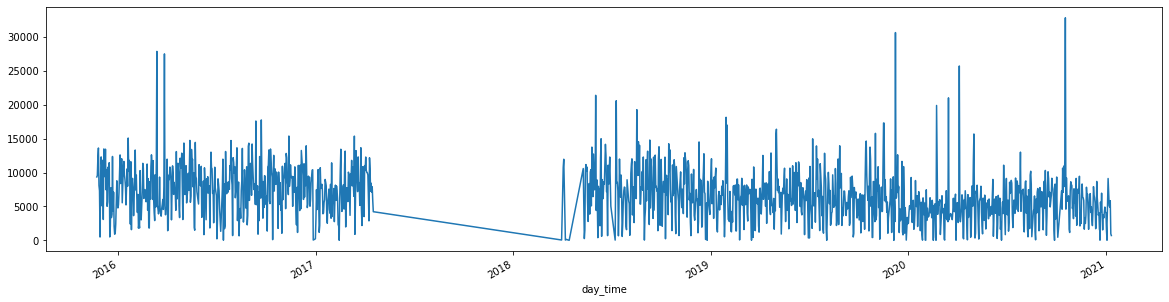

In [364]:
wearable_steps_df['count'].plot(figsize=(20,5))

1. Question . 2017년 ~2018년 왜 데이터가 없지??? 언제인가
2. 평균 걸음수는 ?
 * 년간, 월간, 주간, 요일별

wearable_steps_df.loc[wearable_steps_df['count'] > 20000]

In [ ]:
wearable_steps_df

요일 별 평균 구해보기


In [340]:
wearable_steps_df.groupby(wearable_steps_df.index.dayofweek)['count'].mean()

day_time
0    8186.186603
1    7539.911765
2    7488.052885
3    7429.572115
4    7031.495238
5    4877.092683
6    4300.862069
Name: count, dtype: float64

<AxesSubplot:xlabel='day_time'>

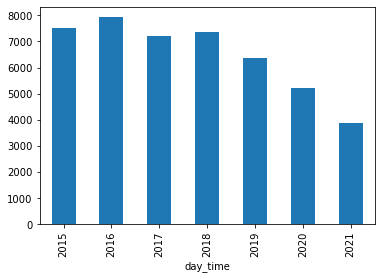

In [346]:
wearable_steps_df.groupby(wearable_steps_df.index.year)['count'].mean().plot(kind='bar')

<AxesSubplot:xlabel='day_time'>

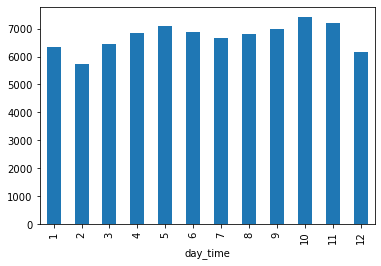

In [347]:
wearable_steps_df.groupby(wearable_steps_df.index.month)['count'].mean().plot(kind='bar')

<AxesSubplot:xlabel='day_time'>

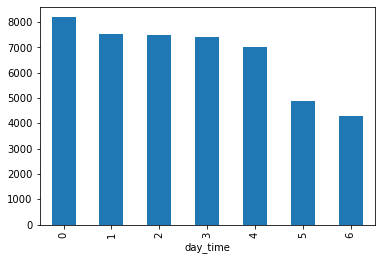

In [348]:
wearable_steps_df.groupby(wearable_steps_df.index.weekday)['count'].mean().plot(kind='bar')